<a href="https://colab.research.google.com/github/iltranqui/OpenAI_Tutorials/blob/main/MalariaCells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
import tensorflow_datasets as tfds

malaria, info = tfds.load(name="malaria",
                          split="train",
                          with_info=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incomplete531JGS/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [ ]:
malaria

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [ ]:
info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_path=PosixGPath('/tmp/tmpyu78s54stfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},

I am shuffling all the images AND preparing the dataset into the RAM. I am literally using 1.6 RAM of GB right now

In [ ]:
malaria = malaria.shuffle(20000).prefetch(tensorflow.data.experimental.AUTOTUNE)

malaria

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

Now i want to visualize this 1st component. I will use Matplotlib

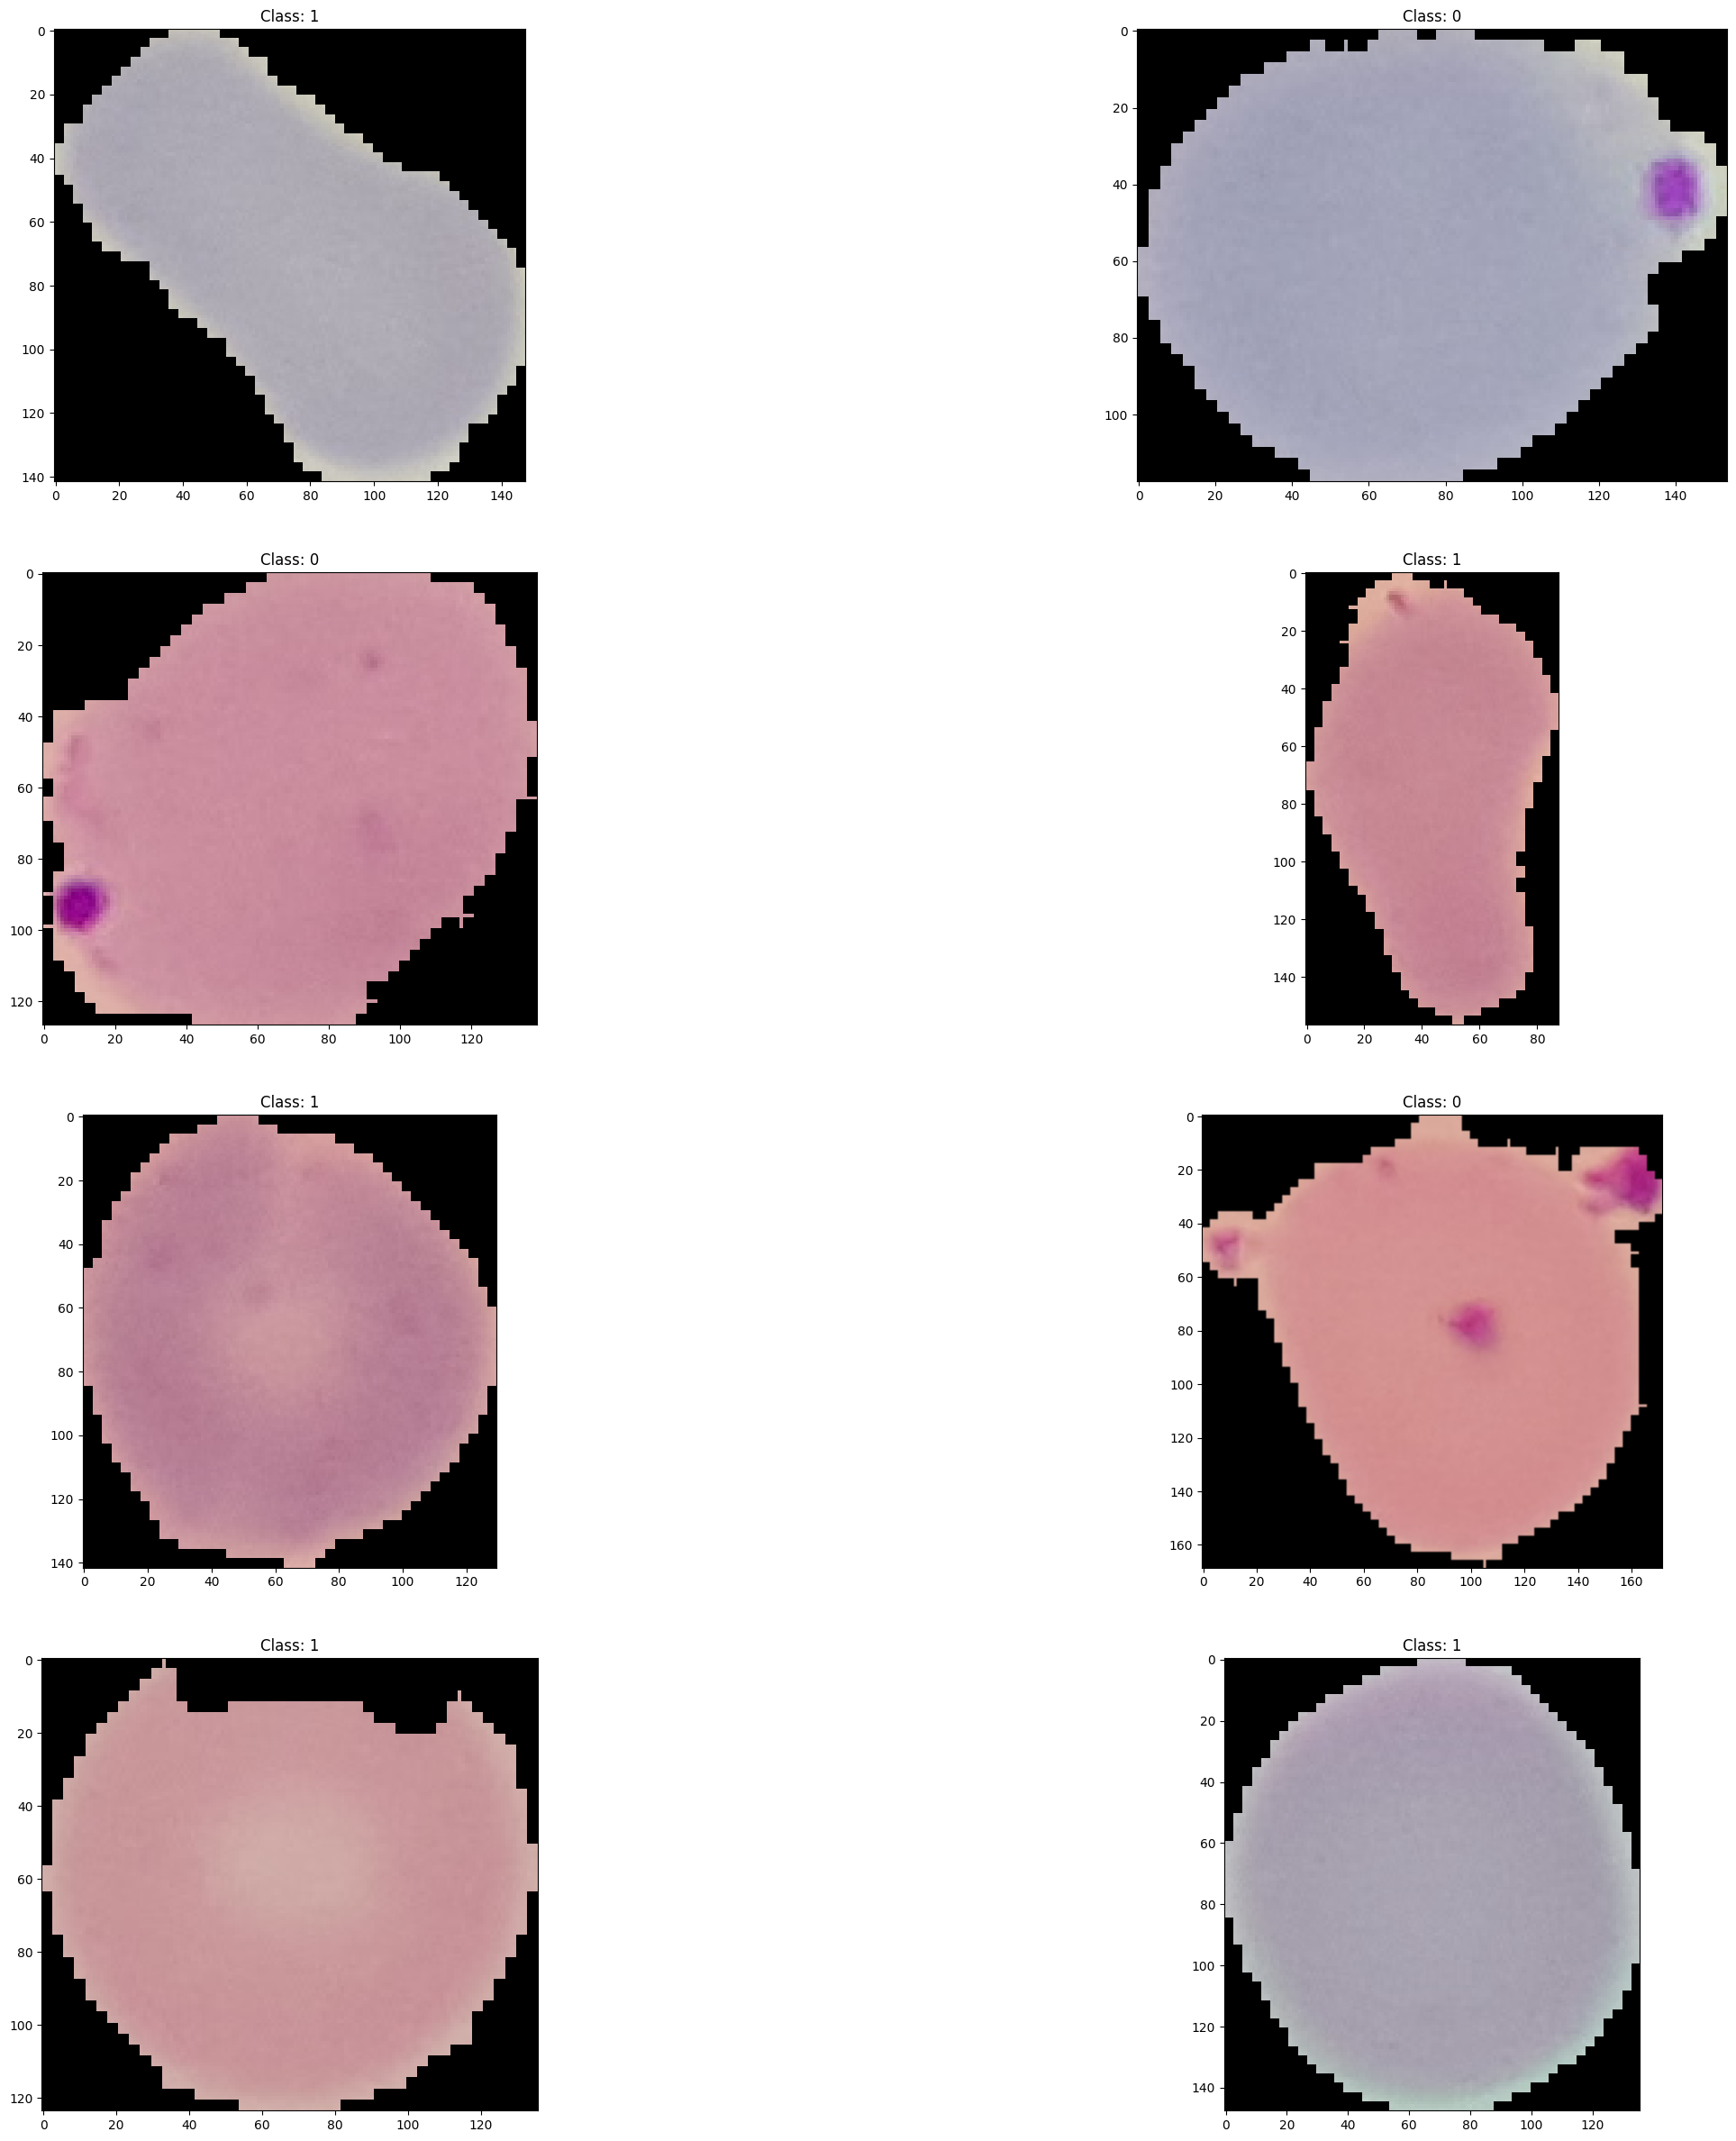

In [ ]:
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(30, 30))

num_of_images = 8

for index, feature in enumerate(malaria.take(num_of_images)):

  image = feature["image"].numpy()

  label = feature["label"].numpy()

  pyplot.subplot(4, 2, index + 1)

  pyplot.title("Class: " + str(label))  # title for each element

  pyplot.imshow(image)

pyplot.show()

Preparing everything to train to understand which cells are infected ( classe 0 ) and which are not ( class 1 ) !

In [ ]:
dataset_length = 8000

new_size = 133   # size of the images you are going to train

training_dataset_length = 0.8

X = int(dataset_length * training_dataset_length)   # amount of images to train


In [ ]:
import numpy

colors = 3

training_images = numpy.zeros((X, new_size, new_size, colors))
#   amount of images, dimension, dimenstion, and then colours ( 3 since it is in RGB , 1 in greyscale )

training_labels = numpy.zeros(X)

y = dataset_length - X

testing_images = numpy.zeros((y, new_size, new_size, colors))

testing_labels = numpy.zeros(y)


In [ ]:
for index, cell in enumerate(malaria.take(dataset_length)):

  image = tensorflow.image.resize(cell["image"],
                                  size=[new_size, new_size]).numpy()

  label = cell["label"].numpy()

  if index < X:

    training_images[index] = image

    training_labels[index] = label

  else:

    testing_images[index - X] = image

    testing_labels[index - X] = label

training_images.shape

training_labels.shape

testing_images.shape

testing_labels.shape

(1600,)

### Training of the dataset




In [ ]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=(new_size,
                                            new_size,
                                            colors)))

model.add(keras.layers.Dense(200, activation="relu"))

model.add(keras.layers.Dense(150, activation="relu"))

model.add(keras.layers.Dense(8))

optimizer = tensorflow.keras.optimizers.Adam()

loss_function = tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

metrics = ["accuracy"]

model.compile(optimizer = optimizer,
              loss = loss_function,
              metrics = metrics)

### Training and Evaluating Neural Network

In [ ]:
number_of_training_loops = 5

model.fit(training_images, training_labels,
          epochs = number_of_training_loops)

testing_loss, testing_accuracy = model.evaluate(testing_images,
                                                testing_labels,
                                                verbose = 2)

Epoch 1/5
200/200 [==============================] - 45s 214ms/step - loss: 532.1611 - accuracy: 0.5289
Epoch 2/5
200/200 [==============================] - 41s 207ms/step - loss: 138.3081 - accuracy: 0.5777
Epoch 3/5
200/200 [==============================] - 42s 210ms/step - loss: 77.5916 - accuracy: 0.6050
Epoch 4/5
200/200 [==============================] - 41s 206ms/step - loss: 22.4139 - accuracy: 0.6145
Epoch 5/5
200/200 [==============================] - 42s 210ms/step - loss: 7.5069 - accuracy: 0.6481
50/50 - 1s - loss: 8.0621 - accuracy: 0.5956 - 1s/epoch - 27ms/step
